In [200]:
import matplotlib as mpl
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image 
from scipy.stats import kde 
import seaborn as sns
import pandas as pd
import xlwt
import xlrd
import openpyxl
import sklearn
import mca
import prince
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.stats.proportion as stats
from scipy.stats import chi2_contingency
from matplotlib import style
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [164]:
datos_total = pd.read_excel(r"C:\Users\Asus\Downloads\Consolidado.xlsx")

In [165]:
datos_total.head()

AÑO  MES      CEDULA  TIPO  SUBTIPO FECHA INICIAL  AÑO.1  MES.1  DÍA  \
0  2022    2    39728588     1        1    2022-01-11   2022      1   11   
1  2022    2  1018480556     1        1    2022-01-07   2022      1    7   
2  2022    2  1019031335     1        1    2022-01-11   2022      1   11   
3  2022    2  1079033635     1        1    2022-01-10   2022      1   10   
4  2022    2    11339889     1        1    2022-01-12   2022      1   12   

   DÍA DE LA SEMANA  ...  NIVELEDUCACION  CODVINCULACIONNOVEDAD   \
0                 3  ...      Licenciado                       2   
1                 6  ...      Licenciado                       2   
2                 3  ...     Profesional                       2   
3                 2  ...      Licenciado                       2   
4                 4  ...      Licenciado                       4   

   VINCULACIONNOVEDAD   CODSITUACIONLABORAL   SITUACIONLABORAL   \
0   Cambios de Sueldo                      1            Normal    
1   Cambios de Sueldo                      1            Normal    
2   Cambios de Sueldo                      1            Normal    
3   Cambios de Sueldo                      1            Normal    
4           Traslados                      1            Normal    

  CODDEPENDENCIA                                        DEPENDENCIA   \
0  C251510010302             ESCUELA URBANA RAFAEL NUNEZ (Primaria)    
1  C258850040714   INSTITUCION EDUCATIVA DEPTAL SAN RAFAEL (Idiom...   
2  C253200012112   INSTITUCION EDUCATIVA DEPARTAMENTAL MIGUEL SAM...   
3  C252970021202        CONCENTRACION URBANA OSWALDO DIAZ(Primaria)    
4  C252000030102                ESCUELA RURAL EL MORTINO (Primaria)    

         FECHACREACION  TO_CHAR(VD.FECHAINI,'DD-MM-YYYY')   \
0   2022-01-04 12:39:47                2022-01-01 00:00:00   
1   2022-01-04 18:11:12                2022-01-01 00:00:00   
2   2022-01-04 18:11:18                2022-01-01 00:00:00   
3   2022-01-04 18:29:16                2022-01-01 00:00:00   
4  04/18/2022 14:56:18                 2022-03-25 00:00:00   

  NUMEROACTOADMINISTRATIVO   
0                 449 -451   
1                 449 -451   
2                 449 -451   
3                 449 -451   
4                      2289  

[5 rows x 56 columns]

In [166]:
datos_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9529 entries, 0 to 9528
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   AÑO                                           9529 non-null   int64         
 1   MES                                           9529 non-null   int64         
 2   CEDULA                                        9529 non-null   int64         
 3   TIPO                                          9529 non-null   int64         
 4   SUBTIPO                                       9529 non-null   int64         
 5   FECHA INICIAL                                 9529 non-null   datetime64[ns]
 6   AÑO.1                                         9529 non-null   int64         
 7   MES.1                                         9529 non-null   int64         
 8   DÍA                                           9529 non-null   int64 

In [167]:
tabla_contingencia = pd.crosstab(datos_total['EDAD'], [datos_total['TIPO'], datos_total['SUBTIPO'], datos_total['FEMENINO']], margins=True)

In [168]:
tabla_contingencia

TIPO         1                           2               ...                 \
SUBTIPO      1         2         3  4    6      7     8  ... 17  18      19   
FEMENINO     0    1    0    1    0  1    0   1  0     0  ...  1   0  1    0   
EDAD                                                     ...                  
21           0    0    0    0    0  0    0   0  0     0  ...  0   0  0    0   
24           0    0    0    0    0  0    0   0  0     0  ...  0   0  0    0   
25           0    0    0    0    0  0    0   0  0     0  ...  0   0  0    0   
26           0    2    0    1    0  0    1   0  0     2  ...  0   0  0    1   
27           6    2    0    0    2  0    1   0  0     6  ...  0   0  0    1   
28           4    1    1    0    2  0    0   0  0    10  ...  0   0  0   10   
29           6    0    0    0    4  0    0   2  0     9  ...  0   0  0    3   
30          13    3    2    0    8  0    2   1  0    11  ...  0   1  0    0   
31          21    4    0    0    8  0    3   0  0    27  ...  0   0  0    8   
32           7    3    1    0   12  0    5   0  0    34  ...  0   0  0   12   
33          22    3    1    0    8  0    1   0  0    33  ...  0   0  0    4   
34          40   11    3    1   10  0    0   0  0    40  ...  0   0  0   14   
35          19    9   12    0   13  0    6   1  0    31  ...  0   0  0   14   
36          37   37    8    2   14  0    4   3  0    31  ...  0   0  0   15   
37          20    4    2    1   11  2    2   3  0    25  ...  0   0  0    9   
38          33   12    3   10   14  0    5   4  0    42  ...  0   1  0   15   
39          52    9    1    4    8  1    5   2  0    75  ...  0   0  0   11   
40          39    4    3    0   10  0    2   3  0    86  ...  0   2  0   26   
41          54   18   28    0    6  0    2   5  0    54  ...  0   1  0   19   
42          44   16   11   13    2  0    4   2  0    77  ...  0   2  0   17   
43          72    6    5    9    4  0   11   3  0    80  ...  0   0  0   14   
44          30   11    6    2    2  0    4   2  0    38  ...  0   0  0   13   
45          16    6   10    0    0  0    2   2  0    35  ...  0   0  0   15   
46          28    8   24    1    0  0    4   2  0    77  ...  0   0  0   17   
47          15    5   25    9    0  0    6   5  0    53  ...  0   0  0    9   
48          25   18    9    4    0  0    3   2  0    83  ...  0   0  0    6   
49          24    4   12    0    0  0   10   0  0    83  ...  0   0  0   19   
50          53    4   24    0    0  0    2   5  0    62  ...  1   1  0   25   
51          60    3   21   12    0  0    2   0  0    58  ...  0   1  0   20   
52          26   10    7    0    0  0    3   0  0    66  ...  0   0  0   26   
53          24    4   20   16    0  0    4   1  0    85  ...  0   1  0   13   
54          39    5   20    1    0  0    8   2  0    78  ...  0   0  1   16   
55          51    6   14    0    0  0    5   2  0    75  ...  0   2  1   29   
56          40   16    6    5    0  0    4   2  0    58  ...  0   0  0   16   
57          46    5    9    1    0  0    8   0  0    74  ...  0   1  0   11   
58          26    4    9    0    0  0    4   3  0    73  ...  0   0  2   21   
59          27   14   18    0    0  0    3   1  0    62  ...  0   0  0   19   
60          43   19   24    2    0  0    5   5  0    44  ...  0   1  0   15   
61          18   24    5    1    0  0    5   2  1    53  ...  0   1  0    9   
62          73    1    8    0    0  0    5   3  0    41  ...  0   0  0   13   
63          48    3   12    0    0  0    0   1  0    38  ...  0   0  0    6   
64          47    6    1    0    0  0    3   1  0    26  ...  0   0  0    9   
65          34   27    5    4    0  0    1   0  0    40  ...  0   0  0   16   
66          54    5    6    5    0  0    2   2  0    18  ...  0   0  0   13   
67          36   14   10    0    0  0    0   1  0     3  ...  0   0  0    0   
68           5   19    7    7    0  0    5   1  0    11  ...  0   0  0    1   
69           8    0    1    0    0  0    0   0  0 

In [169]:
#Tabla de contingencia relativa
tabla_contingencia_r = pd.crosstab(index=datos_total['EDAD'], columns=([datos_total['TIPO'], datos_total['SUBTIPO'], datos_total['FEMENINO']]),
            margins=True).apply(lambda r: r/len(datos_total) *100,
                                axis=1)
tabla_contingencia_r

TIPO              1                                                    \
SUBTIPO           1                   2                   3         4   
FEMENINO          0         1         0         1         0         1   
EDAD                                                                    
21         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26         0.000000  0.020989  0.000000  0.010494  0.000000  0.000000   
27         0.062966  0.020989  0.000000  0.000000  0.020989  0.000000   
28         0.041977  0.010494  0.010494  0.000000  0.020989  0.000000   
29         0.062966  0.000000  0.000000  0.000000  0.041977  0.000000   
30         0.136426  0.031483  0.020989  0.000000  0.083954  0.000000   
31         0.220380  0.041977  0.000000  0.000000  0.083954  0.000000   
32         0.073460  0.031483  0.010494  0.000000  0.125931  0.000000   
33         0.230874  0.031483  0.010494  0.000000  0.083954  0.000000   
34         0.419771  0.115437  0.031483  0.010494  0.104943  0.000000   
35         0.199391  0.094449  0.125931  0.000000  0.136426  0.000000   
36         0.388288  0.388288  0.083954  0.020989  0.146920  0.000000   
37         0.209886  0.041977  0.020989  0.010494  0.115437  0.020989   
38         0.346311  0.125931  0.031483  0.104943  0.146920  0.000000   
39         0.545703  0.094449  0.010494  0.041977  0.083954  0.010494   
40         0.409277  0.041977  0.031483  0.000000  0.104943  0.000000   
41         0.566691  0.188897  0.293840  0.000000  0.062966  0.000000   
42         0.461748  0.167908  0.115437  0.136426  0.020989  0.000000   
43         0.755588  0.062966  0.052471  0.094449  0.041977  0.000000   
44         0.314828  0.115437  0.062966  0.020989  0.020989  0.000000   
45         0.167908  0.062966  0.104943  0.000000  0.000000  0.000000   
46         0.293840  0.083954  0.251863  0.010494  0.000000  0.000000   
47         0.157414  0.052471  0.262357  0.094449  0.000000  0.000000   
48         0.262357  0.188897  0.094449  0.041977  0.000000  0.000000   
49         0.251863  0.041977  0.125931  0.000000  0.000000  0.000000   
50         0.556197  0.041977  0.251863  0.000000  0.000000  0.000000   
51         0.629657  0.031483  0.220380  0.125931  0.000000  0.000000   
52         0.272851  0.104943  0.073460  0.000000  0.000000  0.000000   
53         0.251863  0.041977  0.209886  0.167908  0.000000  0.000000   
54         0.409277  0.052471  0.209886  0.010494  0.000000  0.000000   
55         0.535208  0.062966  0.146920  0.000000  0.000000  0.000000   
56         0.419771  0.167908  0.062966  0.052471  0.000000  0.000000   
57         0.482737  0.052471  0.094449  0.010494  0.000000  0.000000   
58         0.272851  0.041977  0.094449  0.000000  0.000000  0.000000   
59         0.283346  0.146920  0.188897  0.000000  0.000000  0.000000   
60         0.451254  0.199391  0.251863  0.020989  0.000000  0.000000   
61         0.188897  0.251863  0.052471  0.010494  0.000000  0.000000   
62         0.766082  0.010494  0.083954  0.000000  0.000000  0.000000   
63         0.503725  0.031483  0.125931  0.000000  0.000000  0.000000   
64         0.493231  0.062966  0.010494  0.000000  0.000000  0.000000   
65         0.356806  0.283346  0.052471  0.041977  0.000000  0.000000   
66         0.566691  0.052471  0.062966  0.052471  0.000000  0.000000   
67         0.377794  0.146920  0.104943  0.000000  0.000000  0.000000   
68         0.052471  0.199391  0.073460  0.073460  0.000000  0.000000   
69         0.083954  0.000000  0.010494  0.000000  0.000000  0.000000   
70         0.020989  0.020989  0.062966  0.000000  0.000000  0.000000   
71         0.000000  0.083954  0.000000  0.000000  0.000000  0.000000   
72         0.000000  0.073460  0.000000  0.000000  0.000000  0.000000   
All       14.555567  4.218701  4.197712  1.164865  1.44821

In [170]:
# Utilizamos la función chi2_contingency para calcular el índice de Chi-cuadrado y el p-valor
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
# Si el p-valor es menor que 0.05, podemos decir que existe una relación significativa entre las variables
if p < 0.05:
    print("Existe una relación significativa entre las variables (p = {})".format(p))
else:
    print("No existe una relación significativa entre las variables (p = {})".format(p))

Existe una relación significativa entre las variables (p = 1.6746629090041348e-204)


In [171]:
resultados_acm = stats.multinomial_proportions_confint(tabla_contingencia)

# Muestra los resultados
print(resultados_acm)

[[[0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  ...
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [3.33573008e-02 3.96847469e-02]]

 [[0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  ...
  [6.93230439e-05 6.35278187e-04]
  [5.66182671e-05 5.95526512e-04]
  [8.95617858e-03 1.24162645e-02]]

 [[0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  ...
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [8.90795637e-03 1.23595738e-02]]

 ...

 [[0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  ...
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [2.05190803e-06 3.35354163e-04]]

 [[0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  [0.00000000e+00 2.84949620e-04]
  ...
  [0.00000000e+00 2.84949620e-04]
  [0

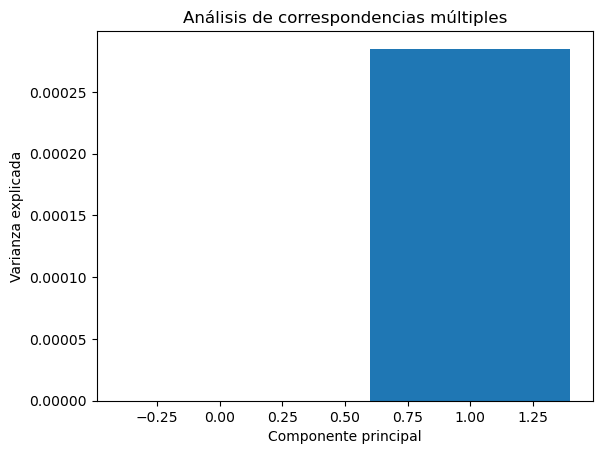

In [174]:
# Carga los resultados del ACM
matriz_cargas = resultados_acm[0][0]
varianza_explicada = resultados_acm[0][1]

# Crea el gráfico de barras
plt.bar(range(len(varianza_explicada)), varianza_explicada)
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.title("Análisis de correspondencias múltiples")
plt.show()


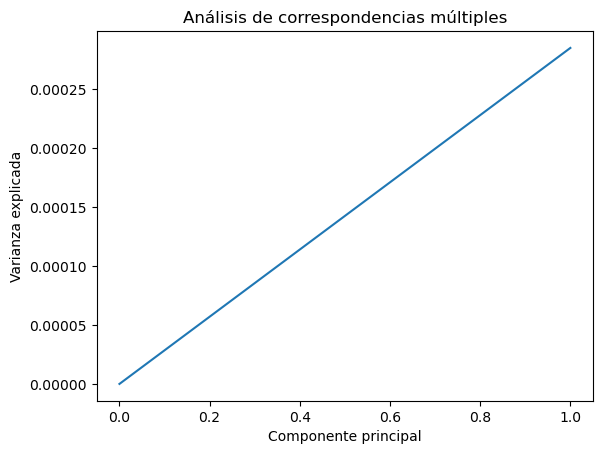

In [185]:


# Carga los resultados del ACM
varianza_explicada = resultados_acm[0][1]

# Crea el gráfico de líneas
plt.plot(range(len(varianza_explicada)), varianza_explicada)
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada")
plt.title("Análisis de correspondencias múltiples")
plt.show()

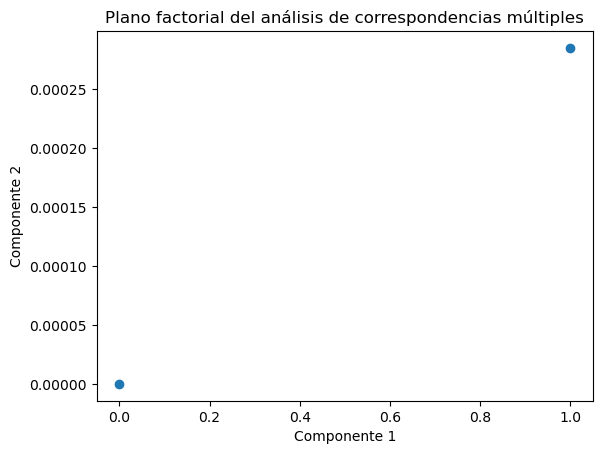

In [189]:


# Carga los resultados del ACM
matriz_cargas = resultados_acm[0][0]

# Crea el gráfico de dispersión
plt.scatter(range(len(varianza_explicada)), varianza_explicada)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Plano factorial del análisis de correspondencias múltiples")
plt.show()


In [197]:


# Calcula el análisis de correspondencias múltiples
resultados_acm = stats.multinomial_proportions_confint(tabla_contingencia)

# Accede a los resultados del ACM
matriz_cargas = resultados_acm[0][0]  # Matriz de cargas
varianza_explicada = resultados_acm[0][1]  # Varianza explicada
proporciones = resultados_acm[0][2]  # Proporciones

# Muestra los resultados
print(matriz_cargas)
print(varianza_explicada)
print(proporciones)

[0.         0.00028495]
[0.         0.00028495]
[0.         0.00028495]


In [180]:
# Calcula el indicador de asociación Phi de Pearson
a = tabla_contingencia.iloc[0, 0]
b = tabla_contingencia.iloc[0, 1]
c = tabla_contingencia.iloc[0, 2]
d = tabla_contingencia.iloc[0, 3]

try:
   # Calcula el indicador de asociación Phi de Pearson
   phi = (a * d - b * c) / ((a + b) * (c + d))**0.5
except ZeroDivisionError:
   # Maneja la excepción de división por cero
   print("Se ha producido una división por cero")
phi = None

C:\Users\Asus\AppData\Local\Temp\ipykernel_9676\4275290758.py:9: RuntimeWarning: invalid value encountered in true_divide
  phi = (a * d - b * c) / ((a + b) * (c + d))**0.5


In [149]:
# Calcula el indicador de asociación Cramer's V
n = tabla_contingencia.sum().sum()
k = tabla_contingencia.shape[0]

cramers = ((n * tabla_contingencia.values.diagonal().sum() - (tabla_contingencia.sum(axis=0) * tabla_contingencia.sum(axis=1)).sum()) / (n * (n - 1)))**0.5 / (k - 1)**0.5

ValueError: cannot join with no overlapping index names

In [160]:
# Crea un objeto MCA
mca_obj = mca.MCA(tabla_contingencia)

# Calcula el análisis factorial y los componentes principales
mca_results = mca_obj.fs_r_sup(1)

# Accede a los resultados del análisis
print(mca_results.L)  # Matriz de cargas
print(mca_results.expl_var)  # Varianza explicada

C:\Users\Asus\anaconda3\envs\Proyecto\lib\site-packages\mca.py:212: RuntimeWarning: divide by zero encountered in true_divide
  S_inv = diagsvd(-1/s[:N], len(self.G.T), N)


AttributeError: 'int' object has no attribute 'div'

In [118]:
n = tabla_contingencia.sum().sum()
k = tabla_contingencia.shape[0]

cramers = ((n * tabla_contingencia.values.diagonal().sum() - (tabla_contingencia.sum(axis=0) * tabla_contingencia.sum(axis=1)).sum()) / (n * (n - 1)))**0.5 / (k - 1)**0.5

ValueError: cannot join with no overlapping index names

In [ ]:
# Calcula el indicador de asociación Cramer's V
n = tabla_contingencia.sum().sum()
k = tabla_contingencia.shape[0]

cramers = ((n * tabla_contingencia.values.diagonal().sum() - (tabla_contingencia.sum(axis=0) * tabla_contingencia.sum(axis=1)).sum()) / (n * (n - 1)))**0.5 / (k - 1)**0.5

In [117]:
# Crea un objeto MCA
mca_obj = mca.MCA(tabla_contingencia)

try:
   # Calcula el análisis factorial y los componentes principales
   mca_results = mca_obj.fs_r_sup(1)
except ZeroDivisionError:
   # Maneja la excepción de división por cero
   print("Se ha producido una división por cero")
   mca_results = None

# Accede a los resultados del análisis
print(mca_results.L)  # Matriz
print(mca_results.expl_var)  # Varianza explicada

AttributeError: 'int' object has no attribute 'div'

In [114]:
# Crea un objeto MCA
mca_obj = mca.MCA(tabla_contingencia)
try:
   # Calcula el análisis factorial y los componentes principales
   mca_results = mca_obj.fs_r_sup(1)
except ZeroDivisionError:
   # Maneja la excepción de división por cero
   print("Se ha producido una división por cero")
mca_results = None
print(mca_results.L)  # Matriz de cargas
print(mca_results.expl_var)  # Varianza explicada

AttributeError: 'int' object has no attribute 'div'

In [115]:
# Crea un objeto MCA
mca_obj = mca.MCA(tabla_contingencia)

# Calcula el análisis factorial y los componentes principales
mca_results = mca_obj.fs_r_sup(1)

# Accede a los resultados del análisis
print(mca_results.L)  # Matriz de cargas
print(mca_results.expl_var)  # Varianza explicada

AttributeError: 'int' object has no attribute 'div'

In [98]:
# Crea un objeto MCA
mca_obj = mca.MCA(tabla_contingencia)
try:
   # Calcula el análisis factorial y los componentes principales
   mca_results = mca_obj.fs_r_sup(1)
except ZeroDivisionError:
   # Maneja la excepción de división por cero
   print("Se ha producido una división por cero")
   mca_results = None

C:\Users\Asus\anaconda3\envs\Proyecto\lib\site-packages\mca.py:212: RuntimeWarning: divide by zero encountered in true_divide
  S_inv = diagsvd(-1/s[:N], len(self.G.T), N)


AttributeError: 'int' object has no attribute 'div'

In [ ]:
dat=datos_total.to_numpy()

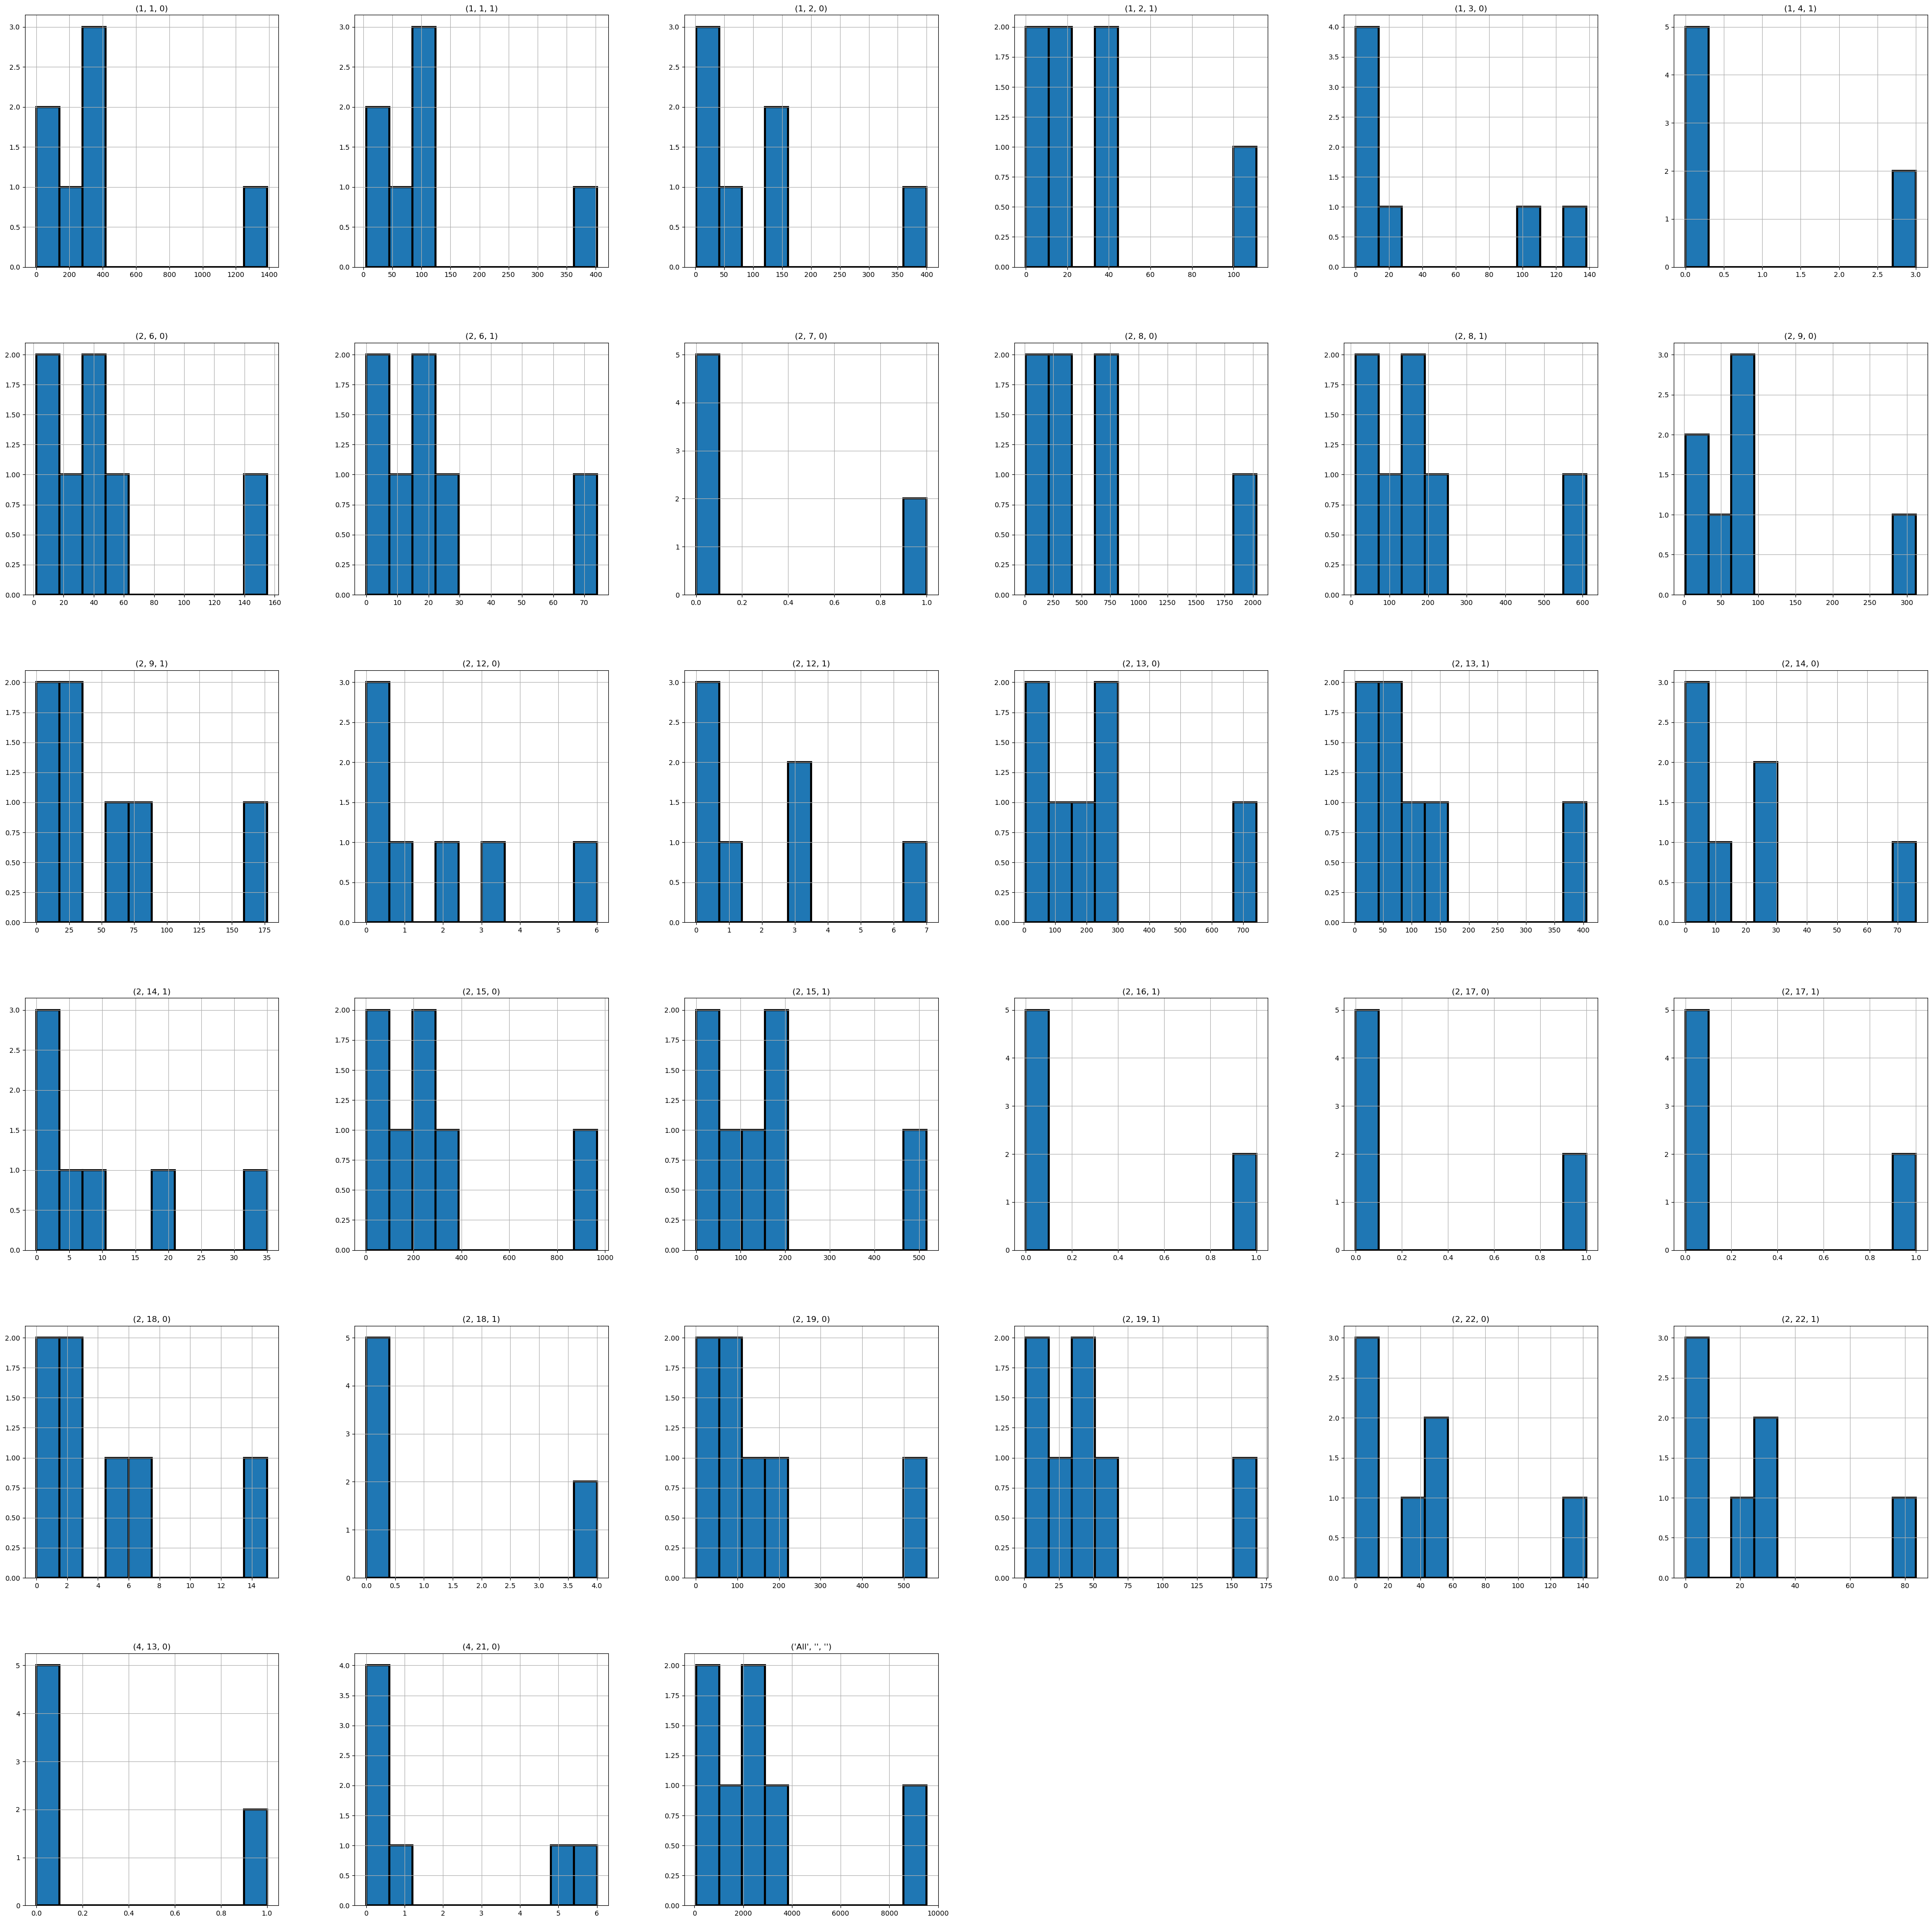

In [19]:
# Visulazing the distibution of the data for every feature
tabla_contingencia.hist(edgecolor='black', linewidth=3, figsize=(50, 50));

In [27]:
#graficando 
plot = datos_total['SUBTIPO'].plot(figsize=(200, 50))

NameError: name 'acm' is not defined

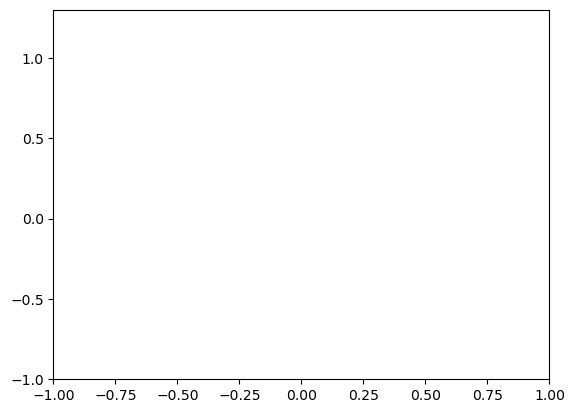

In [34]:
#Establecemos los límites del eje x y y
plt.xlim(-1, 1)
plt.ylim(-1, 1.3)

# Dibujamos el gráfico de líneas
plt.plot(acm)

# Mostramos el gráfico
plt.show()

In [ ]:
datos2 = datos_total[['FECHA INICIAL', 'TIPO', 'SUBTIPO', 'EDAD', 'FEMENINO', 'RANGO DE EDAD']]

In [ ]:
mca = prince.MCA()
mca.fit(datos2)

In [ ]:
mca.plot_coordinates(datos2,
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

In [ ]:
#graficando 
plot = datos_total['EDAD'].plot(figsize=(200, 200))

In [ ]:

mca = prince.MCA(tabla_contingencia)
mca.fit(tabla_contingencia)

In [ ]:
tabla_contingencia2 = pd.crosstab(datos_total['FECHA INICIAL'], [datos_total['EDAD'], datos_total['FEMENINO'], datos_total['RANGO DE EDAD']], margins=True)
tabla_contingencia2

In [ ]:
tabla_contingencia.describe()